##### 시애틀 자전거 이동량 분석

##### 시계열 데이터 다루기 
- 타임스탬프 -> 특정 시점
- 시간 간격과 기간 -> 특정 시작점과 종료점 사이의 시간,
기간은 일반적으로 각 간격이 일정하고 서로 겹치지 않는 특별한 경우의 시간 간격
- 시간 델타(time delta)나 지속 기간(duration)은 정확한 시간 길이

In [110]:
import pandas as pd
import numpy as np

In [111]:
# 파이썬 날짜와 시간
from datetime import datetime
datetime(year=2018, month=11, day=12)


datetime.datetime(2018, 11, 12, 0, 0)

In [112]:
tm = datetime(year=2015, month=7, day=4); print(tm)


2015-07-04 00:00:00


In [113]:
# dateutil을 이용해 다양한 문자열 형태로부터 날짜를 해석
from dateutil import parser
date=parser.parse("11th of Nov, 2018")
print(date)

2018-11-11 00:00:00


In [114]:
# NumPy의 dataetime64
import numpy as np
date = np.array('2018-11-12', dtype=np.datetime64)
date


array('2018-11-12', dtype='datetime64[D]')

In [115]:
print(date)

2018-11-12


In [116]:
date + np.arange(12)

array(['2018-11-12', '2018-11-13', '2018-11-14', '2018-11-15',
       '2018-11-16', '2018-11-17', '2018-11-18', '2018-11-19',
       '2018-11-20', '2018-11-21', '2018-11-22', '2018-11-23'],
      dtype='datetime64[D]')

In [117]:
np.datetime64('2018-11-12')


numpy.datetime64('2018-11-12')

In [118]:
np.datetime64('2018-11-13 12:00')

numpy.datetime64('2018-11-13T12:00')

##### Pandas 시계열 데이터 조작

In [119]:
index = pd.DatetimeIndex(['2017-10-12', '2017-11-12',
 '2018-10-12', '2018-11-12'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2017-10-12    0
2017-11-12    1
2018-10-12    2
2018-11-12    3
dtype: int64

In [120]:
data['2017-10-12':'2017-11-12']

2017-10-12    0
2017-11-12    1
dtype: int64

In [121]:
data['2018']

2018-10-12    2
2018-11-12    3
dtype: int64

In [122]:
# https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [123]:
# 데이터를 직관적으로 구성하고 접근하기 위해 날짜와 시간을 인덱스로 사용하는 능력은 pandas 시계열도구
# 중요한 부분. 
# 인덱스를 가진 데이터의 이점 (연산하는 동안 자동 정렬, 직관저인 데이터 슬라이싱 및 접근)
# pandas는 주로 금융환경에서 개발 되었기 때문에 몇몇 금융 데이터에 특호된 전용도구 포함

In [124]:
!pip install pandas_datareader

In [125]:
# https://wikidocs.net/4373
#주식데이터 불러올수 있음
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2016, 2, 19)
end = datetime.datetime(2016, 3, 4)


In [126]:
gs = web.DataReader("078930.KS", "yahoo", start, end)


In [127]:
gs.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-19,51100,49950,50300,50600,301800,40053.964844
2016-02-22,50800,49850,50300,50400,153961,39895.648438
2016-02-23,53000,50800,50800,52800,431934,41795.441406
2016-02-24,53500,51900,52000,53500,259616,42349.550781
2016-02-25,54700,52700,53900,53900,170839,42666.175781


In [128]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2016-02-19 to 2016-03-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       10 non-null     int64  
 1   Low        10 non-null     int64  
 2   Open       10 non-null     int64  
 3   Close      10 non-null     int64  
 4   Volume     10 non-null     int64  
 5   Adj Close  10 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 560.0 bytes


In [129]:
gs = web.DataReader("078930.KS", "yahoo")

In [130]:
gs.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1227 entries, 2017-11-03 to 2022-11-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1227 non-null   float64
 1   Low        1227 non-null   float64
 2   Open       1227 non-null   float64
 3   Close      1227 non-null   float64
 4   Volume     1227 non-null   float64
 5   Adj Close  1227 non-null   float64
dtypes: float64(6)
memory usage: 67.1 KB


In [131]:
import matplotlib.pyplot as plt


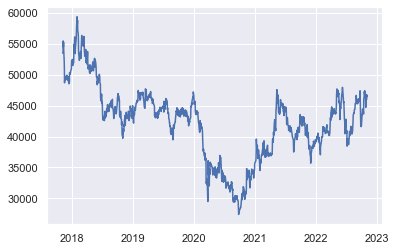

In [132]:
plt.plot(gs['Adj Close'])
plt.show()


In [133]:
gs.index

DatetimeIndex(['2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10', '2017-11-13', '2017-11-14',
               '2017-11-15', '2017-11-16',
               ...
               '2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-31',
               '2022-11-01', '2022-11-02'],
              dtype='datetime64[ns]', name='Date', length=1227, freq=None)

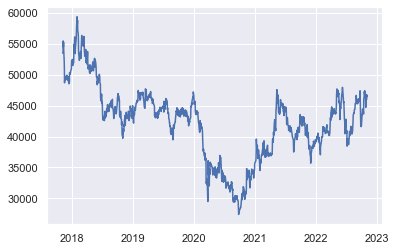

In [134]:
plt.plot(gs.index, gs['Adj Close'])
plt.show()


##### 시애틀 자전거 수 시각화

In [135]:
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [136]:
import pandas as pd
import numpy as np

In [137]:
data = pd.read_csv("FremontBridge.csv", index_col = 'Date', parse_dates=True)
data.head(5)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [138]:
# 열이름을 단축하고 total 추가
data.columns = ['East', 'West']
data['Total'] = data.eval('East+West')
data.head(5)


,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [139]:
#요약 통계
data.describe()

,East,West,Total
count,53271.000000,53271.000000,53271.000000
mean,57.434401,54.368549,111.802951
std,82.795998,71.282743,140.682271
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,72.000000,146.000000
max,717.000000,698.000000,957.000000


In [140]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
seaborn.set()


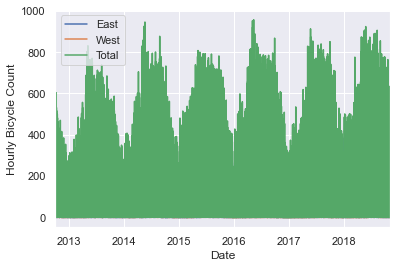

In [141]:
data.plot()
plt.ylabel('Hourly Bicycle Count');
#년마다 hourly bicycle count의 변화가 비슷하다
#계절별로 여름으로 갈수록 증가하고, 겨울이 될수록 감소한다.
#봄일 경우 기울기가 가파르고 가을일 경우 기울기가 완만? 
#꾸준히 이용하는 고객이 있다?

Text(0, 0.5, 'Weekly bicycle count')

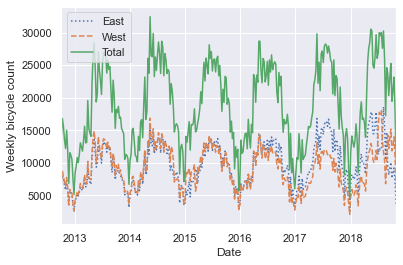

In [142]:
# 25,000개의 시간별 표본 이해하기 어려움
# 데이터를 주 단위로 리 샘플링
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count')


In [143]:
# 겨울보다 여름에 자전거를 더 많이 타며
# 특정 계절에는 자전거 사용 횟수가 주 마다 달라진다. 

Text(0, 0.5, 'mean hourly count')

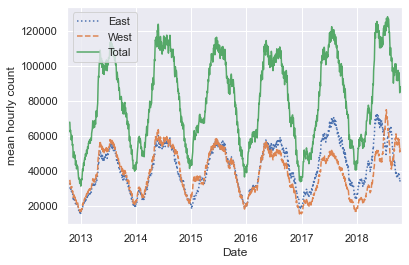

In [144]:
# 30일 이동 평균(rolling)
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')
#비슷한 추세를 보이다가 2017-2018년도에는 west에서 급격하게 증가하는 추세를 가지다가 2018년도 이후에는 west, east 둘다 형태가 바뀌었다.


<AxesSubplot:xlabel='Date'>

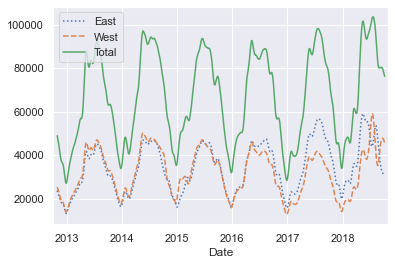

In [145]:
# 가우스평활(Gaussian smoothing) 적용
# 가우스 윈도우(Gaussian window) 같은 윈도우 함수를 사용해 롤링 평균을 부드럽게 표현
# 윈도우 폭(50일)과 윈도우내 가우스 폭(10) 지정
daily.rolling(50, center=True,
 win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

 #2017년도부터 2년간 west다리는 공사중일 가능성이 있다.
 #2018년도부터는 마찬가지로 2년간 그래프 역전현상이 일어날 가능성이 있다.

<AxesSubplot:xlabel='time'>

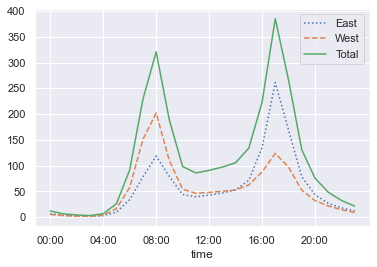

In [146]:
# 하루의 시간대를 기준으로 한 함수로 평균 통행량을 보고 싶을때
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])
#출퇴근 시간?을 봤을때 6시간 근무를 한다는 것을 도출해 낼 수 있다.

In [147]:
# 아침 8시, 저녁 5시 무렵에 많이 사용
# 동서가 확연하게 나누어짐.. 출근 사용량

<AxesSubplot:>

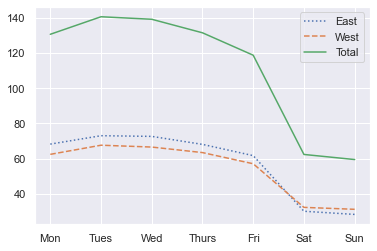

In [148]:
# 요일별 통행량은? 
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])
#우리나라일 경우 목요일 회식 문화가 생기는 추세이기때문에 목요일이 낮고 금요일이 더 높은 형태를 띈다.

In [149]:
# 주중에 많고.. 주말에 적음.. 출퇴근 용 가능성..

In [150]:
# 주중과 주말의 시간대별 추이
# 데이터를 주말을 표시하는 플래그와 시간대별로 분류
weekend = np.where(data.index.weekday <5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

- 아이디어: 자전거 수리 출장 서비스
- 다리에서 자전거 수리 대기?
- 혹은 앱서비스를 통해서 자전거를 대여해줌과 동시에 수리해서 원하는 장소로 가져다 주는 서비스

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

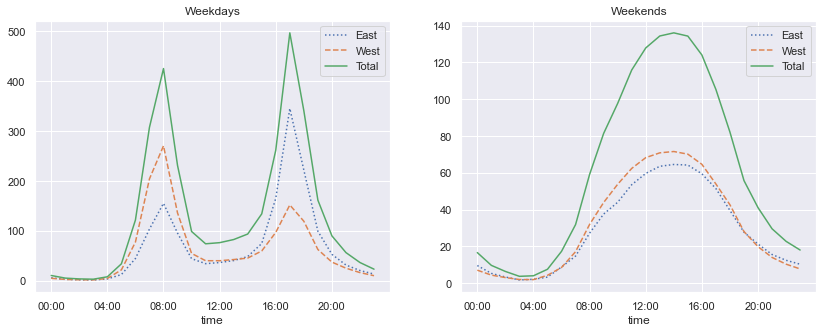

In [151]:
# 다중 서브플롯
import matplotlib.pyplot as plt
fgs, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
 xticks=hourly_ticks, style=[':','--','-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
 xticks=hourly_ticks, style=[':','--','-'])


In [152]:
# 주중에서 양봉형태.. 주말에는 낮시간에 피크..
# 출퇴근 패턴에 영향을 미치는 날시와 온도, 연중 시기등 기타 요인 분석이 필요

In [153]:
# Is settle really Seeing an Uptick In Cycling? 


In [154]:
# ( 시애틀의 자전거 통행량 예측 ) 
# 미 기상청의 데이터세트와 연결
# 선형 회귀를 사용해 날씨와 다른 정보를 자전거 수와 관련 짓고
# 이 가운데 한 가지 모수의 변화가 해당 일자에 자전거를 탄 사람의 수에 어떻게 영향을 주는 지 추정


In [155]:
# 데이터를 적재하고 날짜를 인덱스로 지정
# FremontBridge.csv --> goo.gl/o3FkTM
# BicycleWeather.csv -> goo.gl/7ncbCd
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [156]:
counts.head(3)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0


In [157]:
weather.head(3)

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [158]:
# 일별 총 자전거 통랭량을 계산해서 별도의 DataFrame에 넣음
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # 다른 열 삭제

In [159]:
daily.head(3)

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0


In [160]:
# 요일을 나타내는 열 추가
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
 daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [161]:
daily.head(3)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [162]:
# 휴일에 자전거를 타는 사람
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)


In [163]:
daily.head(3)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


C:\Users\user\AppData\Local\Temp\ipykernel_1260\1101272332.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


(8.0, 17.0)

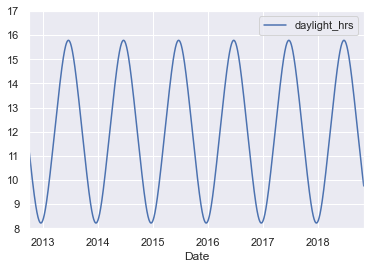

In [164]:
# 일조시간에 자전거를 타는 사람
def hours_of_daylight(date, axis=23.44, latitude=47.61):
 # 해당 날짜의 일조시간 계산
 days = (date - pd.datetime(2000, 12, 21)).days
 m = (1. -np.tan(np.radians(latitude))
 * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
 return 24 * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)


In [165]:
# 데이터에 평균 기온과 전체 강수량 추가
# 인치 단위의 강수량과 더불어 날이 건조했는지(강수량이 0) 알려주는 플래그 추가
# 기온은 섭씨 1/10도 단위, 섭씨 1도 단위로 변환
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (c)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
# 강수량은 1/10mm 단위; 인치 단위로 변환
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (c)', 'dry day']])

In [166]:
daily.head(4)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (c),dry day
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0


In [167]:
# 첫날 부터 증가하는 계수기를 추가해 몇 해가 지났는지를 측정
# 관측된 일별 통행량이 연도별로 증가하거나 감소하는지를 측정
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [168]:
daily.head(5)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (c),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [169]:
# 요일 플래그는 해당 요일에 특화된 절편으로 동작하기 때문에 fit_intercept = False로 설정

In [170]:
# 널값 행은 제거
daily.dropna(axis=0, how='any', inplace=True)
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 
 'holiday', 'daylight_hrs', 'PRCP', 'dry day','Temp (c)', 'annual']
X = daily[column_names]
y = daily['Total']


In [171]:
X.head(3)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,dry day,Temp (c),annual
Date,,,,,,,,,,,,,
2012-10-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,1.0,13.35,0.000000
2012-10-04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,1.0,13.60,0.002740
2012-10-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,1.0,15.30,0.005479


<AxesSubplot:xlabel='Date'>

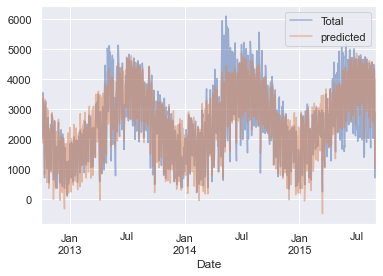

In [172]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)
#총 자전거 통행량과 예상 자전거 통행량 비교
daily[['Total', 'predicted']].plot(alpha=0.5)


In [173]:
# 여름에 차이가 많이 남
# 고려한 요인 외
## -. 사람들이 일하러 갈때 자전거를 탈지 결정하는 데 영향을 주는 요인은 뭐가 있을까? 
# 미처 고려하지 못한 비선형 관계
## -. 사람들이 기온이 너무 높거나 낮을 때 자전거를 덜 탈 수 도 있다. 

In [174]:
# 각 특징이 요일별 자전거 통행량에 얼마나 기여하는지 추정하는 선형 모델 계수
params = pd.Series(model.coef_, index=X.columns)
params
#절대값이 가장 큰 것이 영향력이 가장 큼: holiday

Mon              504.882756
Tue              610.233936
Wed              592.673642
Thu              482.358115
Fri              177.980345
Sat            -1103.301710
Sun            -1133.567246
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp (c)          65.162791
annual            26.942713
dtype: float64

In [175]:
# 불확실성에 대한 척도 없이는 해석이 어려움
# 데이터의 부트스트랩 표본 재추출(bootstrap resampling)을 사용하여 불확실성을 계산
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
 for i in range(1000)], 0 )


In [176]:
# 추정된 오차를 가지고 결과를
print(pd.DataFrame({'effect' : params.round(0), 'error' : err.round(0)}))

              effect  error
Mon            505.0   86.0
Tue            610.0   83.0
Wed            593.0   83.0
Thu            482.0   85.0
Fri            178.0   81.0
Sat          -1103.0   80.0
Sun          -1134.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -665.0   62.0
dry day        548.0   33.0
Temp (c)        65.0    4.0
annual          27.0   18.0


In [177]:
# 주단위로 비교적 안정적인 추세
# 주말과 휴일보다 주중에 자전거를 타는 사람이 훨씬 많다. 
# 일조시간이 1시간 늘어날때마다 129+-9명이 더 자전거를 탄다. 
# 기온이 섭씨 1도씩 증가할 때마다 65+-4명의 사람이 더 자전거를 잡는다. 
# 맑은날은 평균 548+_33명이 더 자전거를 탄다. 
# 강수량이 1인치 늘어날때마다 665+-62명의 사람이 자전거를 집에 두고 나온다. 
# 매년 일별 자전거 사용자가 27+-18명씩 완만하게 증가하고 있다. 


In [178]:
# 이 모델이 몇가지 관련 정보를 누락하고 있음. 
## -.비 선형 효과(예. 강수량과 추운 기온의 영향),
## -.각 변수 내의 비선형 추세(예. 매우 춥거나 매우 더운 온도에서 자전거 통행량의 감소)
# 는 이 모델로 설명할 수 없음. 
# 몇 가지 세부적인 정보는 고려하지 않았음. 
## -. 아침에 비가 오는 것과 오후에 비가 오는 것의 차이
## -. 요일간의 상관 관계